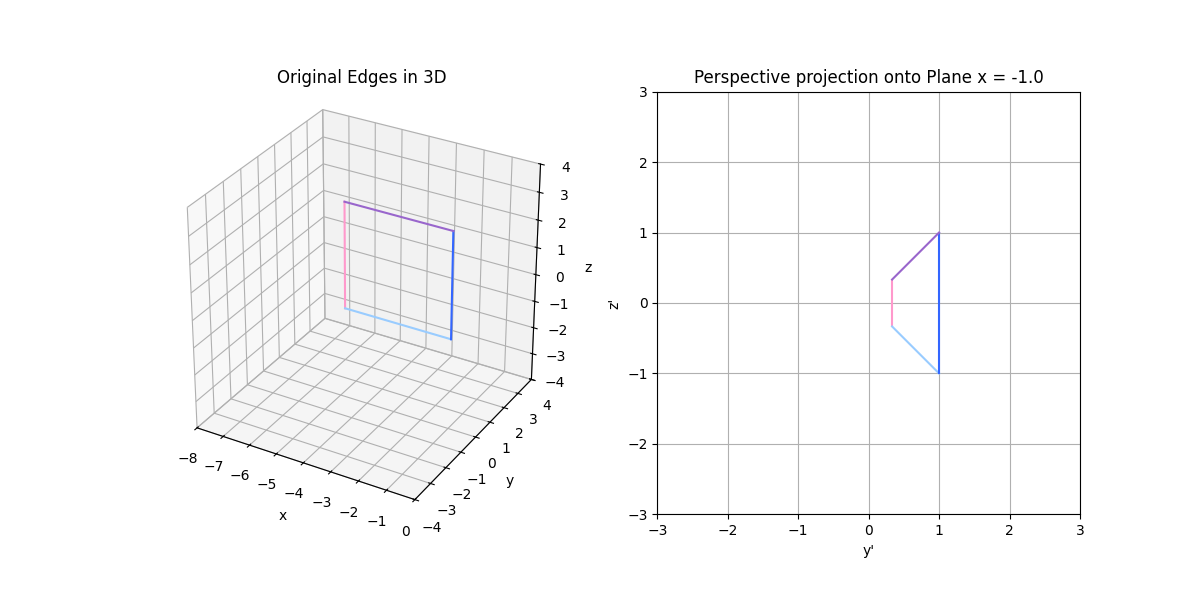

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

def central_project_point(P, plane_point, plane_normal):
    '''projection of point P to the plane defined by point and normal (in our case x=-1)'''
    plane_normal = plane_normal / np.linalg.norm(plane_normal)
    denom = np.dot(plane_normal, P) #do not put points on the plane x=0... you don't see them... (and even x>-1 is not good)
    if denom == 0:
        return None
    t = np.dot(plane_normal, plane_point) / denom
    return t * P

def project_line_from_two_points(P0, P1, plane_point, plane_normal):
    """projection of two points and drawing line between them"""
    Q0 = central_project_point(P0, plane_point, plane_normal)
    Q1 = central_project_point(P1, plane_point, plane_normal)
    if Q0 is None or Q1 is None:
        return np.empty((3, 0))
    return np.linspace(Q0, Q1, 100).T

# Projection plane  x = a (we look from the (0,0) point, and it is our "canvas")
a = -1.0
proj_plane_point = np.array([a, 0.0, 0.0])
proj_plane_normal = np.array([1.0, 0.0, 0.0])

# Our four points (here we have square for convenience, you can make whatever you want)
points = [
    np.array([-6.0,  2.0, 2.0]),
    np.array([-6.0,  2.0, -2.0]),
    np.array([-2.0,  2.0, -2.0]),
    np.array([-2.0,  2, 2])
]

# Lines between points
edges = [(points[i], points[(i+1)%4]) for i in range(4)]
projections = [project_line_from_two_points(p0, p1, proj_plane_point, proj_plane_normal) for p0, p1 in edges]

# Colors for edges
colors = [
    (1.0, 0.6, 0.8),     # pink
    (0.6, 0.8, 1.0),     # blue
    (0.2, 0.4, 1.0),     # darkblue
    (0.6, 0.4, 0.8)      # purple
]

# Plots
fig = plt.figure(figsize=(12, 6))

# 3D plot of the initial square
ax1 = fig.add_subplot(121, projection='3d')
for (p0, p1), color in zip(edges, colors):
    ax1.plot([p0[0], p1[0]], [p0[1], p1[1]], [p0[2], p1[2]], color=color)
ax1.set_title("Original Edges in 3D")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.set_xlim(-8, 0)
ax1.set_ylim(-4, 4)
ax1.set_zlim(-4, 4)
ax1.set_box_aspect([1, 1, 1])

# Projection: how it looks with perspective.
ax2 = fig.add_subplot(122)
for proj, color in zip(projections, colors):
    if proj.shape[1] > 0:
        ax2.plot(proj[1], proj[2], color=color)
ax2.set_title(f"Perspective projection onto Plane x = {a}")
ax2.set_xlabel("y'")
ax2.set_ylabel("z'")
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_aspect('equal')
ax2.grid(True)

#plt.tight_layout()
plt.show()